In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
import wrangle_mall

## Clustering Modeling Exercises

1. Clustering with the Iris Dataset
    - Choose features other than the ones used in the lesson.
    - Visualize the results of your clustering.
    - Use the elbow method to visually select a good value for k.
    - Repeat the clustering, this time with 3 different features.

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

3. How does scaling impact the results of clustering?

### Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

- How do you interpret the cluster centers for scaled data?
- See if you can give names to the clusters you found in the mall dataset. What common traits do the clusters share?
- Using the mall customer dataset, encode gender as 1 or 0. Cluster with gender as a feature. How might you interpret where the cluster center is in the gender dimension? How might you visualize this?
- Using the tips dataset, create 3 clusters. Analyze the cluster centers. What do they tell you about the customers at this restaurant? Try different combinations of features for your clustering.

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Choose features other than the ones used in the lesson.

In [4]:
X = iris[['sepal_width', 'petal_width']]

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [6]:
iris['cluster'] = kmeans.predict(X)
iris

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


### Visualize the results of your clustering.

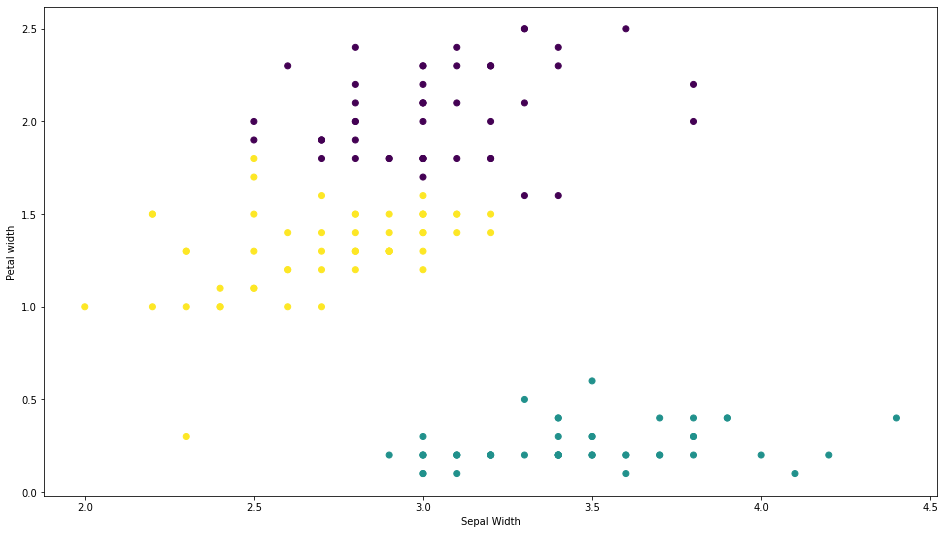

In [7]:
plt.figure(figsize=(16, 9))
plt.scatter(iris.sepal_width, iris.petal_width, c=iris.cluster)

plt.xlabel('Sepal Width')
plt.ylabel('Petal width')
plt.show()

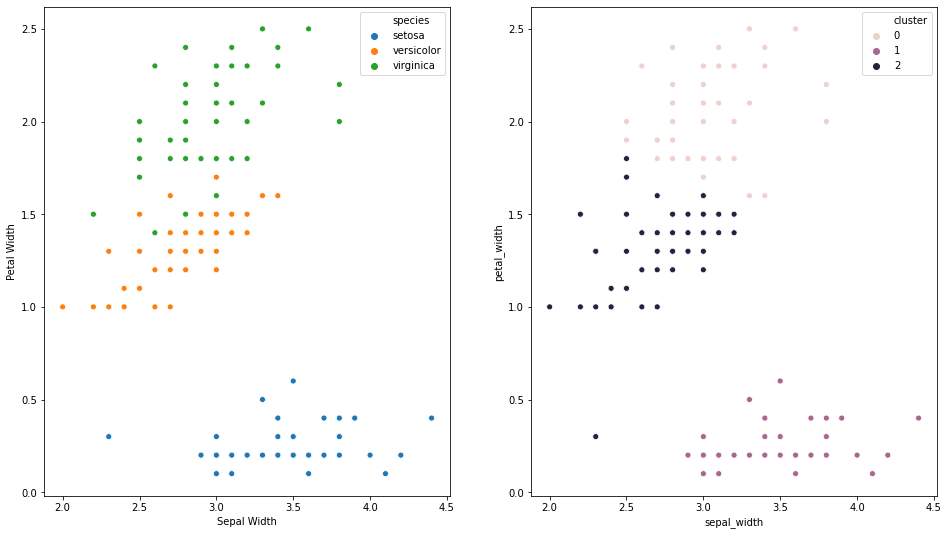

In [8]:
plt.figure(figsize=(16, 9))

plt.subplot(121)
sns.scatterplot(iris.sepal_width, iris.petal_width, hue=iris.species)
plt.legend()
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.subplot(122)
sns.scatterplot(iris.sepal_width, iris.petal_width, hue=iris.cluster)
plt.show()

## Cluster Centers

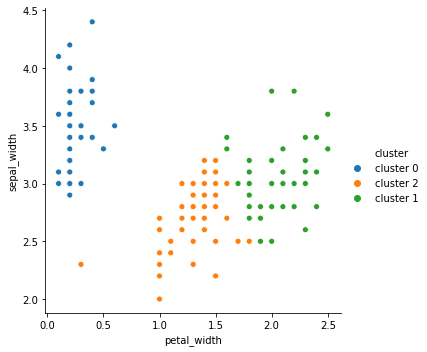

In [9]:
k = 3
kmeans = KMeans(k)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster ' + iris.cluster.astype(str)

sns.relplot(data=iris, y='sepal_width', x='petal_width', hue='cluster')

In [10]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,sepal_width,petal_width
0,3.451020,0.244898
1,3.041667,2.052083
2,2.707547,1.309434


In [11]:
iris.groupby('cluster')['sepal_width', 'petal_width'].mean()

,sepal_width,petal_width
cluster,,
cluster 0,3.451020,0.244898
cluster 1,3.041667,2.052083
cluster 2,2.707547,1.309434


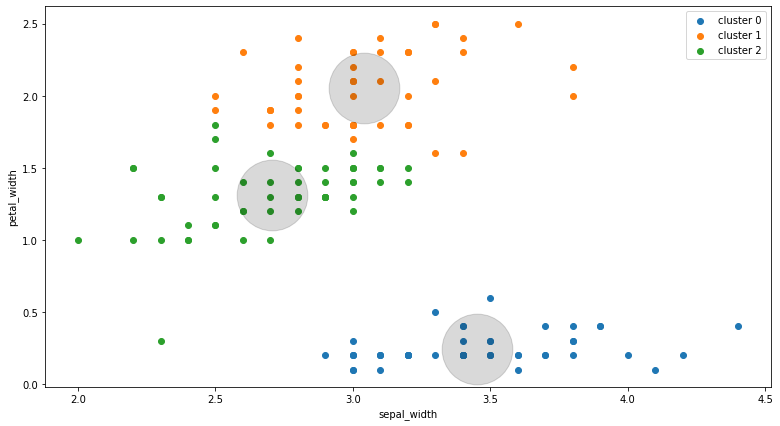

In [12]:
plt.figure(figsize=(13, 7))
for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label=cluster)
    
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids.plot.scatter(x='sepal_width', y='petal_width', ax=plt.gca(), alpha=.15, s=5000, c='black')
plt.legend()

### Use the elbow method to visually select a good value for k.

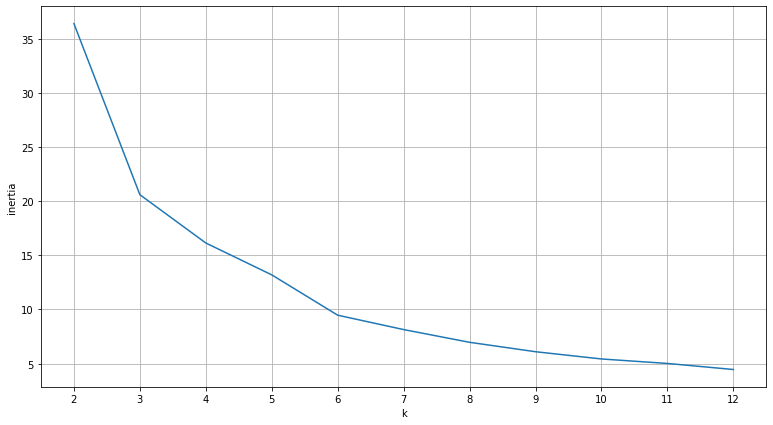

In [13]:
def get_inertia(k):
    kmeans = KMeans(k)
    kmeans.fit(X)
    return kmeans.inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

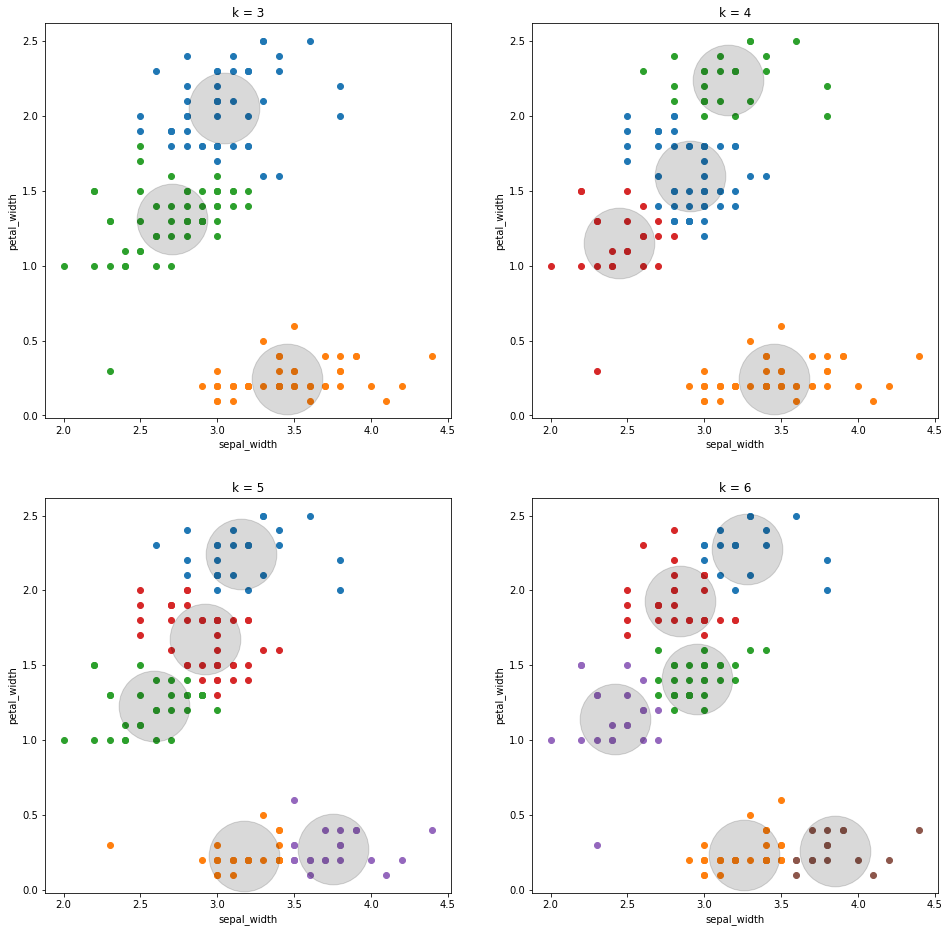

In [14]:
plt.figure(figsize=(16, 16))

for i, k in enumerate([3, 4, 5, 6]):
    plt.subplot(2, 2, i + 1)
    kmeans = KMeans(k)
    kmeans.fit(X)
    iris['cluster'] = kmeans.predict(X)
    iris.cluster = 'cluster ' + iris.cluster.astype(str)
    for cluster, subset in iris.groupby('cluster'):
        plt.scatter(subset.sepal_width, subset.petal_width, label=cluster)
        
    centriods = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    centriods.plot.scatter(x='sepal_width', y='petal_width', ax=plt.gca(), alpha=.15, s=5000, c='black')
    plt.title(f'k = {k}')

### Repeat the clustering, this time with 3 different features.

In [15]:
X2 = iris[['sepal_width', 'petal_width', 'sepal_length']]

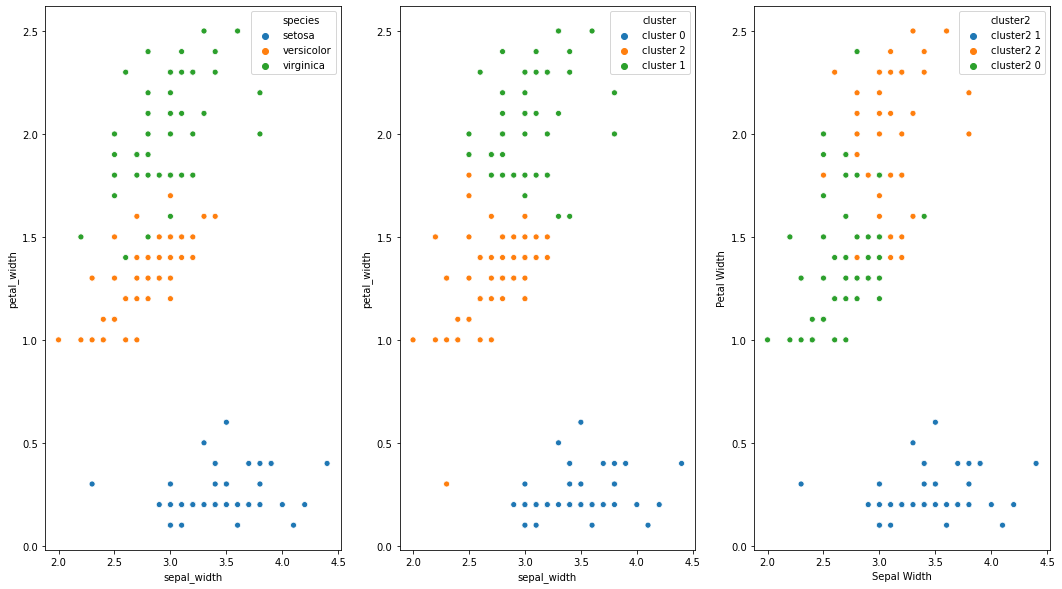

In [16]:
kmeans = KMeans(3)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster ' + iris.cluster.astype(str)

kmeans.fit(X2)
iris['cluster2'] = kmeans.predict(X2)
iris.cluster2 = 'cluster2 ' + iris.cluster2.astype(str)

plt.figure(figsize=(18, 10))

plt.subplot(131)
sns.scatterplot(iris.sepal_width, iris.petal_width, hue=iris.species)
plt.subplot(132)
sns.scatterplot(iris.sepal_width, iris.petal_width, hue=iris.cluster)
plt.subplot(133)
sns.scatterplot(iris.sepal_width, iris.petal_width, hue=iris.cluster2)
plt.legend()
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

plt.show()

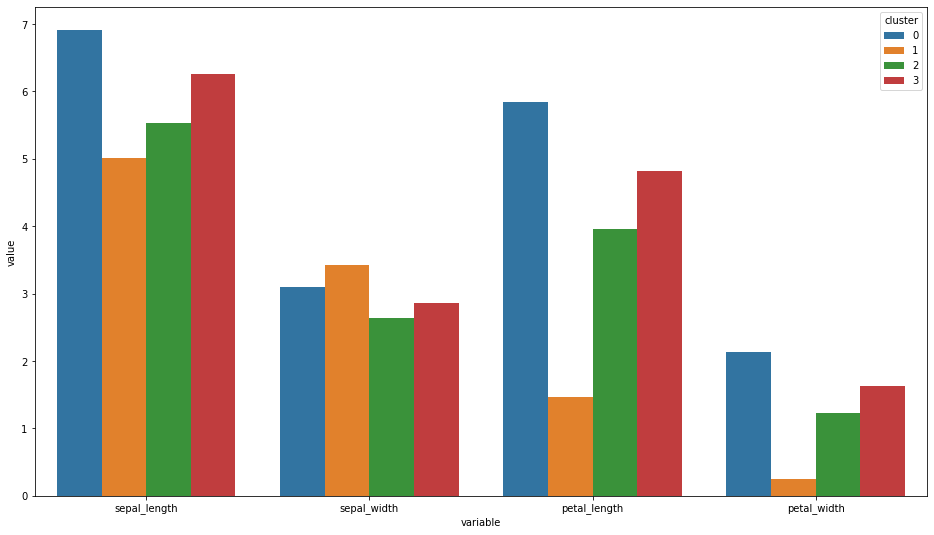

In [17]:
# Review with Zack

plt.figure(figsize=(16,9))

iris2 = sns.load_dataset('iris')
X = iris2.drop(columns='species')
kmeans = KMeans(4).fit(X)

(pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    .reset_index()
    .rename(columns={'index': 'cluster'})
    .melt(id_vars='cluster')
    .pipe((sns.barplot, 'data'), y='value', x='variable', hue='cluster')
)

## Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. 

In [18]:
mall = wrangle_mall.get_mall_data()

In [19]:
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [21]:
X = mall[['age', 'annual_income', 'spending_score']]

### Let's visualize

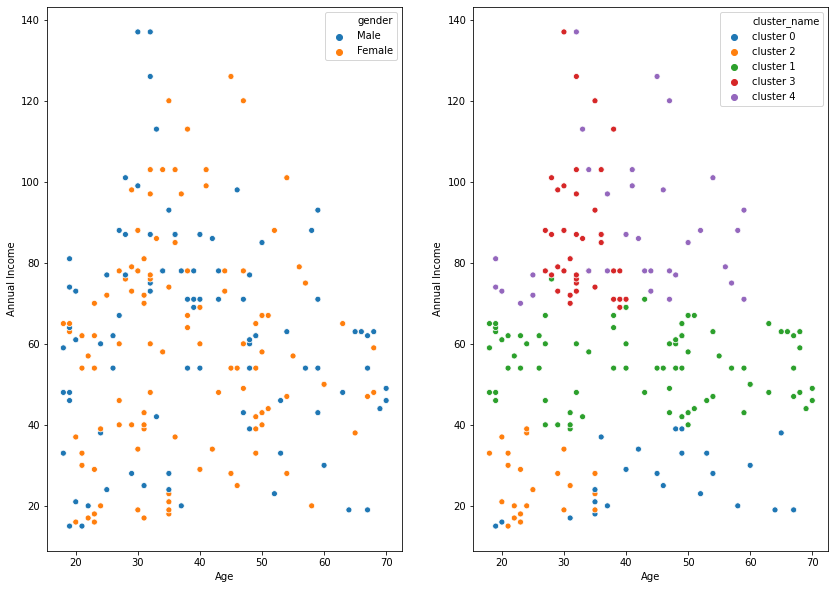

In [22]:
kmeans = KMeans(5)
kmeans.fit(X)

mall['cluster'] = kmeans.predict(X)
mall['cluster_name'] = 'cluster ' + mall.cluster.astype(str)

plt.figure(figsize=(14, 10))
plt.subplot(121)
sns.scatterplot(mall.age, mall.annual_income, hue=mall.gender)

plt.xlabel('Age')
plt.ylabel('Annual Income')

plt.subplot(122)
sns.scatterplot(mall.age, mall.annual_income, hue=mall.cluster_name)

plt.legend()
plt.xlabel('Age')
plt.ylabel('Annual Income')

plt.show()

### Cluster Centers

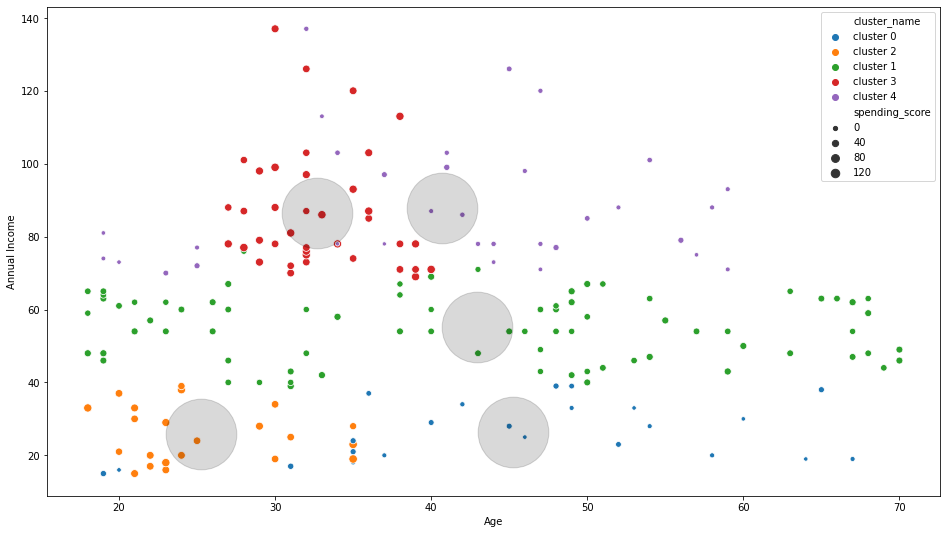

In [23]:
plt.figure(figsize=(16, 9))

sns.scatterplot(mall.age, mall.annual_income, hue=mall.cluster_name, size=mall.spending_score)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids.plot.scatter(x='age', y='annual_income', ax=plt.gca(), alpha=.15, s=5000, c='black')

plt.legend()
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

### Now let's scale the data

In [24]:
mall2 = wrangle_mall.get_mall_data()
train_scaled, test_scaled = wrangle_mall.prep_mall_data(mall2)

In [25]:
train_scaled.head()

,customer_id,age,annual_income,spending_score,gender_male,gender_female
24,0.108108,0.714286,0.127907,0.134021,0.0,1.0
150,0.789189,0.489796,0.709302,0.164948,1.0,0.0
114,0.594595,-0.020408,0.558140,0.484536,0.0,1.0
33,0.156757,-0.020408,0.186047,0.938144,1.0,0.0
23,0.102703,0.244898,0.093023,0.742268,1.0,0.0


In [26]:
X2 = train_scaled[['age', 'annual_income', 'spending_score']]

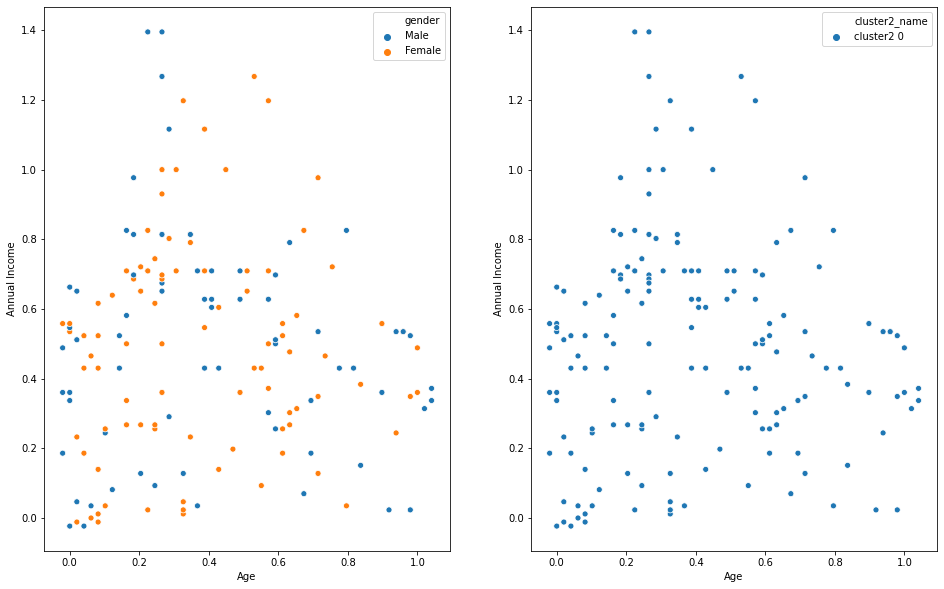

In [32]:
kmeans2 = KMeans(5)
kmeans2.fit(X2)

train_scaled['cluster2'] = kmeans.predict(X2)
train_scaled['cluster2_name'] = 'cluster2 ' + train_scaled.cluster2.astype(str)


plt.figure(figsize=(16, 10))
plt.subplot(121)
sns.scatterplot(X2.age, X2.annual_income, hue=mall.gender)

plt.xlabel('Age')
plt.ylabel('Annual Income')

plt.subplot(122)
sns.scatterplot(X2.age, X2.annual_income, hue=train_scaled.cluster2_name)

plt.legend()
plt.xlabel('Age')
plt.ylabel('Annual Income')

plt.show()

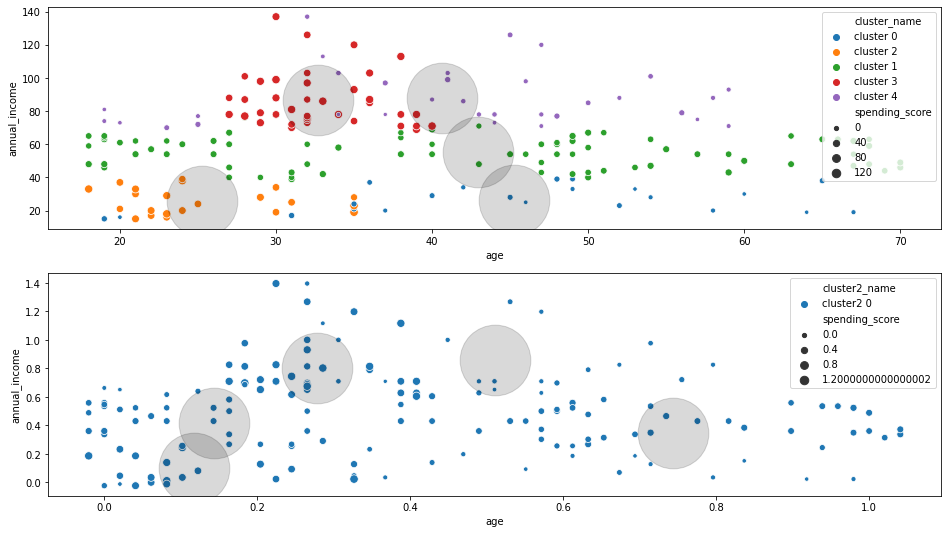

In [33]:
f, axes = plt.subplots(2, 1, figsize=(16, 9))

sns.scatterplot(mall.age, mall.annual_income, hue=mall.cluster_name, size=mall.spending_score, ax=axes[0])

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids.plot.scatter(x='age', y='annual_income', ax=axes[0], alpha=.15, s=5000, c='black')

sns.scatterplot(X2.age, X2.annual_income, hue=train_scaled.cluster2_name, size=X2.spending_score, ax=axes[1])

centroids = pd.DataFrame(kmeans2.cluster_centers_, columns=X2.columns)
centroids.plot.scatter(x='age', y='annual_income', ax=axes[1], alpha=.15, s=5000, c='black')

In [34]:
from mpl_toolkits.mplot3d import Axes3D

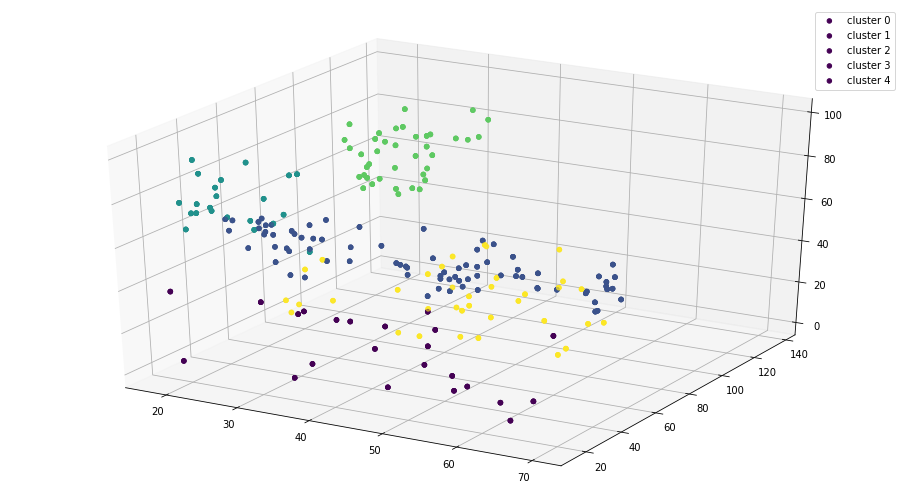

In [35]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')
for cluster, subset in mall.groupby('cluster_name'):
    ax.scatter(X.age, X.annual_income, X.spending_score, 
           c=mall.cluster.tolist(), label=cluster)
plt.legend()